In [1]:
# import mido
# import numpy as np
# import matplotlib.pyplot as plt
# ########
# ## data_preparation
# def preprocess(filename):
#     pass


# def synthesize(midi_obj):
#     pass


# '''
# midi_list = map( preprocess, filelist )
# '''


'\nmidi_list = map( preprocess, filelist )\n'

In [28]:
fname = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid'
mid = mido.MidiFile(fname)
# ?mid

In [38]:
track

midi.Track(\
  [midi.TrackNameEvent(tick=0, text='Continuo (Organ)', data=[67, 111, 110, 116, 105, 110, 117, 111, 32, 40, 79, 114, 103, 97, 110, 41]),
   midi.ProgramChangeEvent(tick=0, channel=10, data=[19]),
   midi.NoteOnEvent(tick=960, channel=10, data=[50, 88]),
   midi.NoteOffEvent(tick=1905, channel=10, data=[50, 0]),
   midi.NoteOnEvent(tick=1920, channel=10, data=[51, 88]),
   midi.NoteOffEvent(tick=2390, channel=10, data=[51, 0]),
   midi.NoteOnEvent(tick=2400, channel=10, data=[50, 88]),
   midi.NoteOffEvent(tick=2634, channel=10, data=[50, 0]),
   midi.NoteOnEvent(tick=2640, channel=10, data=[52, 88]),
   midi.NoteOffEvent(tick=2874, channel=10, data=[52, 0]),
   midi.NoteOnEvent(tick=2880, channel=10, data=[53, 88]),
   midi.NoteOffEvent(tick=3114, channel=10, data=[53, 0]),
   midi.NoteOnEvent(tick=3120, channel=10, data=[54, 88]),
   midi.NoteOffEvent(tick=3354, channel=10, data=[54, 0]),
   midi.NoteOnEvent(tick=3360, channel=10, data=[55, 88]),
   midi.NoteOffEvent(tic

In [604]:
%%bash
DIR='sample/MIDI/' 
for MIDI in $(ls -1 $DIR/*.mid)
do
timidity -Ow -s 16000 $MIDI
done

Playing sample/MIDI//composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid
MIDI file: sample/MIDI//composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid
Format: 1  Tracks: 13  Divisions: 240
Track name: (C) & (P) 1993
Track name: CCARH,Stanford
Track name: Oboe I & II
Track name: Trombone I
Track name: Trombone II
Track name: Trombone III
Track name: Trombone IV
Track name: Violino I
Track name: Violino II
Track name: Viola
Track name: Continuo
Track name: Continuo (Organ)
No instrument mapped to tone bank 0, program 43 - this instrument will not be heard
No instrument mapped to tone bank 0, program 63 - this instrument will not be heard
Output sample/MIDI//composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.wav
Playing time: ~337 seconds
Notes cut: 0
Notes lost totally: 0
Playing sample/MIDI//composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02.mid
MIDI file: sample/MIDI//com

In [3]:
# 

In [2]:
import os,subprocess

DIR = 'sample/MIDI/'
# fname = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid'
FILES = list(os.walk(DIR))[0][-1]
FILES = [os.path.join(DIR,f) for f in FILES]
# for fname in FILES:
    
#     print ["timidity -Ow", fname]
#     out = subprocess.check_call(["timidity","-Ow", fname])

In [82]:
# chunks.shape
# chunks[0].__len__()
# print len(chunks[0])
chunks = np.array(chunks[:])
chunks.shape

# chunks[0].shape

(4680, 800)

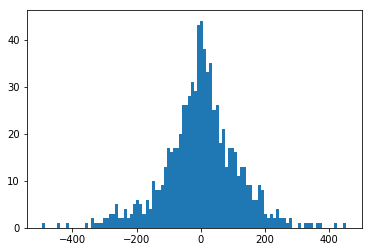

In [87]:
%matplotlib inline
x = chunks[0]
# plt.hist((p.x0),100);
plt.hist( x,100);
# plt.hist(np.sign(p.x0)*np.log2(np.abs(p.x0)+1),50)

In [6]:
import scipy.io.wavfile as spwave
import util
import numpy as np
import cPickle as pk
fname = 'sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-03.mid'
for fname in FILES:
    if not fname.endswith('.mid'):
        continue
# if 1:
    bname = fname.rsplit('.',1)[0]
    print bname


    try:
#     if 1:
        mroll = util.extract_midi_roll(fname, DEBUG=0)
        p = util.piece( '%s.wav' % bname)
        p.downsample(16000)
        print len(p.x0)
        print p.x0.dtype
#         p.xs = None
        print p.x0.std()/p.x0.mean()
#         p.x0 = p.x0 /2**15
        p.x0 = p.x0.astype("float32") /2**15
        print p.x0.std()/p.x0.mean()
        print p.x0.dtype

        chunks = p.to_chunk(20)[:len(mroll)]
        chunks = np.expand_dims(chunks,0)
#         d = {
#             "name":bname,
#             "sound":chunks,
#             "mroll":mroll}.items()
#         pk.dump(d, open('%s.npy' % bname,'wb') )
        d = [chunks,mroll]
#         d = [bname,chunks,mroll]
        np.save('%s.npy' % bname, d)
#             "name":bname,
#             "sound":chunks,
#             "mroll":mroll}
# #             bname,[chunks,mroll]}
#                )
#         np.save('%s.npy' % bname,[chunks,mroll])
#         np.save('%s.npy' % bname,[np.expand_dims(to_chunk(p,20)[:len(mroll)],0),mroll])
    except Exception as e:
#         raise e
        print "[FAIL]:%s"%fname
        print e

# spwave.read(fname)


sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-01
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
3816566
int16
56.4606491187
56.4606
float32
4771
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-03
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
5872473
int16
-272.604643881
-272.605
float32
7341
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
[ERROR]'program_change channel=4 program=45 time=302' msg is not recognised
2764784
int16
-96.823932578
-96.8239
float32
3456
[FAIL]:sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02.mid
object of type 'NoneType' has no len()
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-06
[FAIL]:sample

sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-01.mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
1
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-03.mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
2
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.wav
MThd not found. Probably not a MIDI file
2
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02.mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
[ERROR]'program_change channel=4 program=45 time=302' msg is not recognised
3
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-06.mid
attribute must be in range 0..99
3
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.sw
MThd not found. P

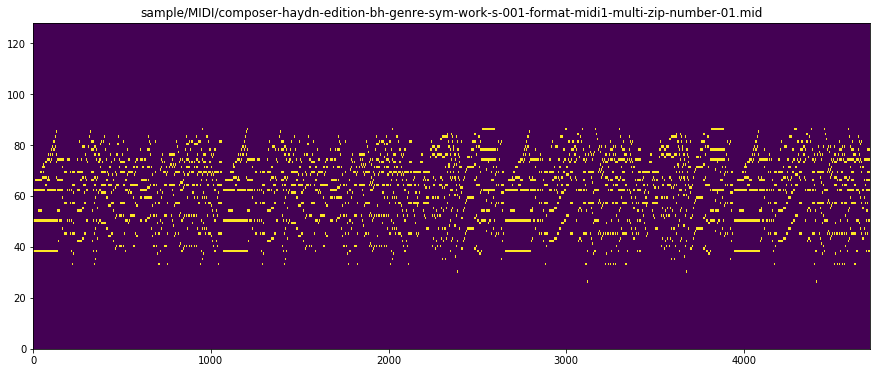

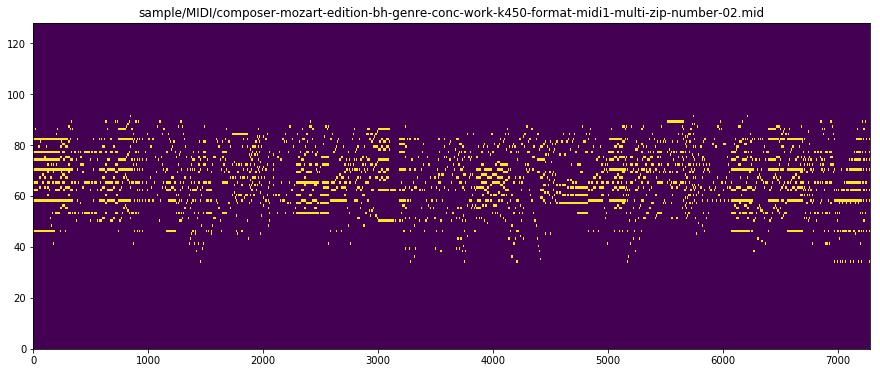

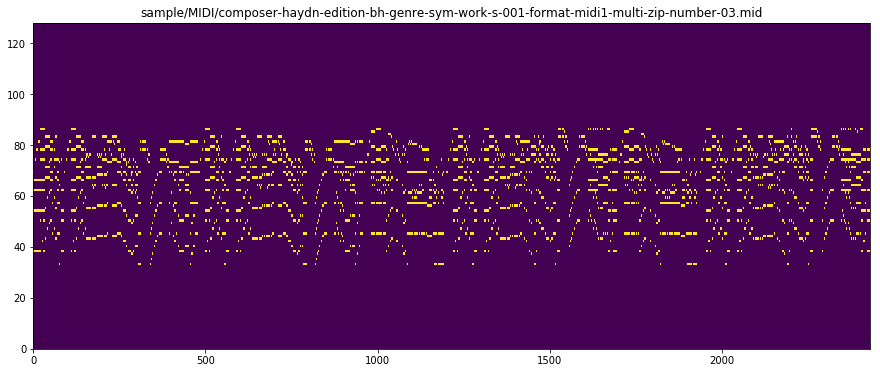

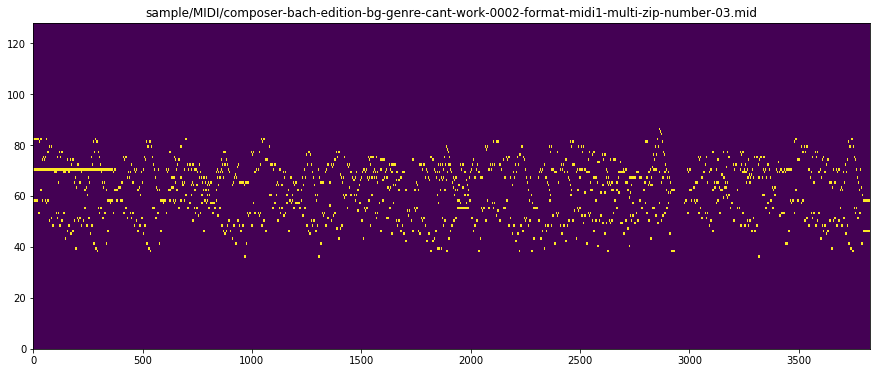

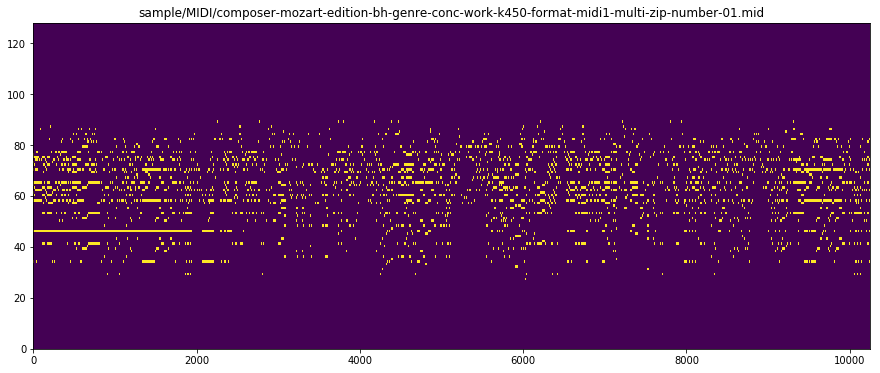

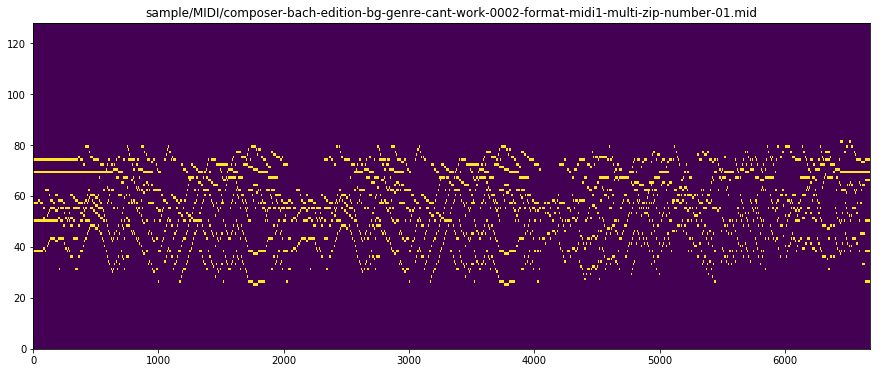

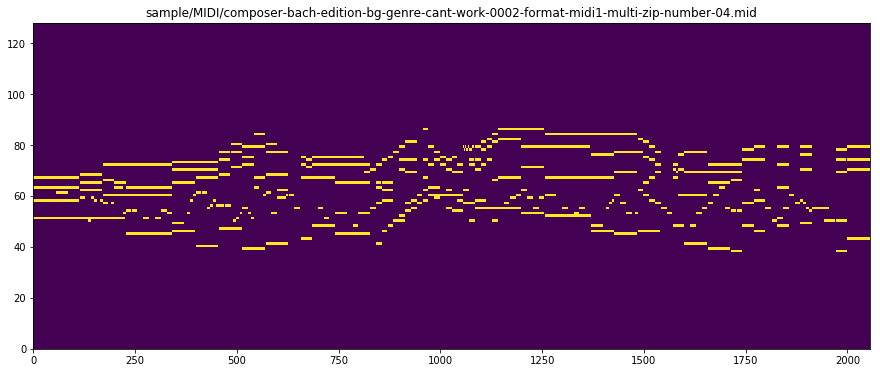

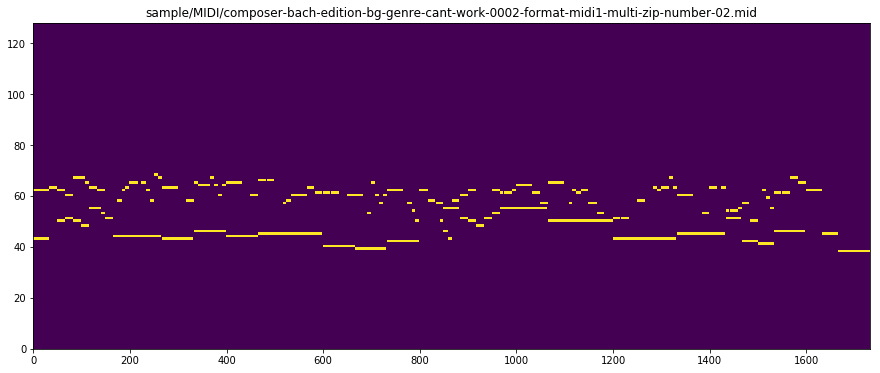

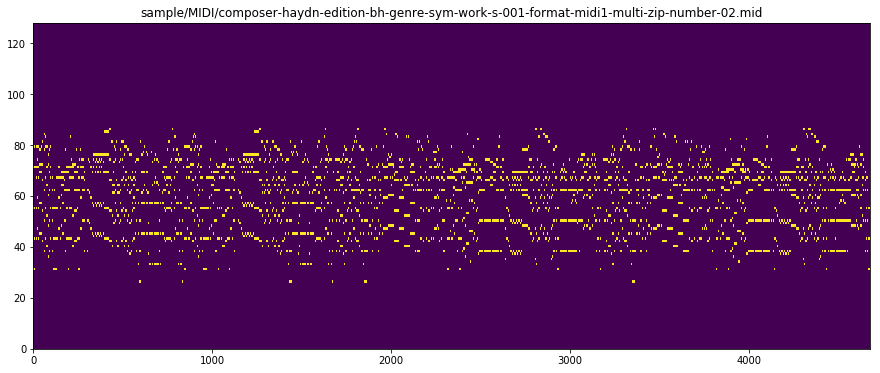

In [525]:
# def chunker(track,dt = 0.1):
#     pass
import os,subprocess

DIR = 'sample/MIDI/'
fname = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid'

# from os import walk

# f = []
FILES = list(os.walk(DIR))[0][-1]
FILES = [os.path.join(DIR,f) for f in FILES]
# _,_,os.walk(DIR)
# for (dirpath, dirnames, filenames) in os.walk(mypath):
#     f.extend(filenames)
#     break
# if 1:

lst = []
for fname in FILES:
    print fname
#     print fname
    try:
    # print os.listdir(DIR)
    # ?os.listdir
        mid = mido.MidiFile(fname)
        mroll = util.extract_midi_roll( fname)
        plt.title(fname)
        lst.append( mroll )
    except Exception as e:
        print e
    print len(lst)
#     lst.append(mroll)

        #     track = mid.tracks[-1]

# for mroll in lst:
#     plot_midi_roll(mroll)


#     mid.ticks_per_beat

In [87]:
# for track in mid.tracks:
#     print track.time

120
1
1
74754
74754
74876
74876


NameError: name 'mid' is not defined

In [117]:
1 // .4

2.0

In [ ]:
# OUTPUT
# import math
# ??mido.tick2second
# mido.tick2second(MAX_TIME,mid.ticks_per_beat,TEMPO)
sample_intick = mido.second2tick( sample_dt,mid.ticks_per_beat,TEMPO)
# np.array()
import numpy as np
# ?np.array
# mido.tick2second(MAX_TIME)
# OUTPUT = np.array()
signal_0 = [0]*128
LENGTH = int(MAX_TICK // sample_intick) + 1 
OUTPUT = [signal_0 ]*  LENGTH

In [6]:
def detect_format(track):
    isNOTE=0
    for msg in track[:100]:
        if msg.type == 'note_on':
            isNOTE = 1
        if msg.type == 'note_off':
            return 'OnOff'
    if isNOTE:
        return 'OnOnly'
    else:
        return None

In [169]:
# mid.filename
# detect_format(track)#
it = (x for x in track)
next(it)

<meta message track_name name=u'Trombone II' time=0>

In [160]:
# msg.__dict__['type'] = 'note_off'
# msg.type

'note_off'

In [166]:
# print(next(track))

TypeError: MidiTrack object is not an iterator

In [174]:
while msg:
    msg = next(it,None)
type(msg)

NoneType

In [4]:
# sample_intick
# from util import *

In [493]:
# fname = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.mid'
fname = FILES[0]
for fname in FILES:
    filename=fname
    try:
        if 1:
            mid = mido.MidiFile(filename)
            mid.TEMPO = get_tempo(mid)
        print mid
        print '\n'.join(list(str(x) for x in mid.tracks[0][:10]))
        print 
    except:
        print fname

<midi file 'sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-01.mid' type 1, 9 tracks, 15025 messages>
<meta message track_name name=u'untitled' time=0>
<meta message text text=u'CREATOR# Don Anthony, 29 July 1999\n' time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=3 frames=0 sub_frames=0 time=0>
<meta message time_signature numerator=2 denominator=2 clocks_per_click=48 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message set_tempo tempo=342857 time=0>
<meta message end_of_track time=0>

<midi file 'sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-03.mid' type 1, 16 tracks, 20268 messages>
<meta message track_name name=u'untitled' time=0>
<meta message text text=u'CREATOR# Don Anthony, 16 November 1999\n' time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=3 frames=0 sub_frames=0 time=0>
<meta message time_signature

[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message track_name name=u'(C) & (P) 1993' time=0>
[WARN]:No notes were detected in <meta message track_name name=u'CCARH,Stanford' time=0>


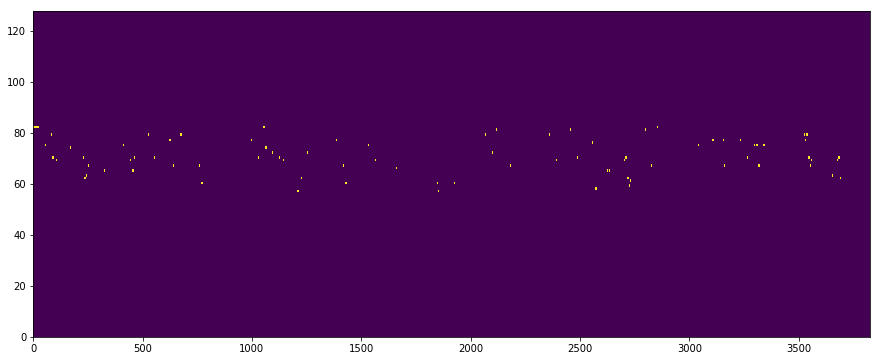

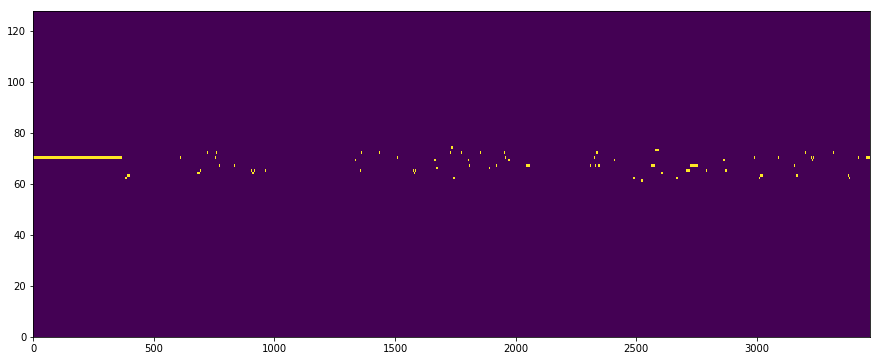

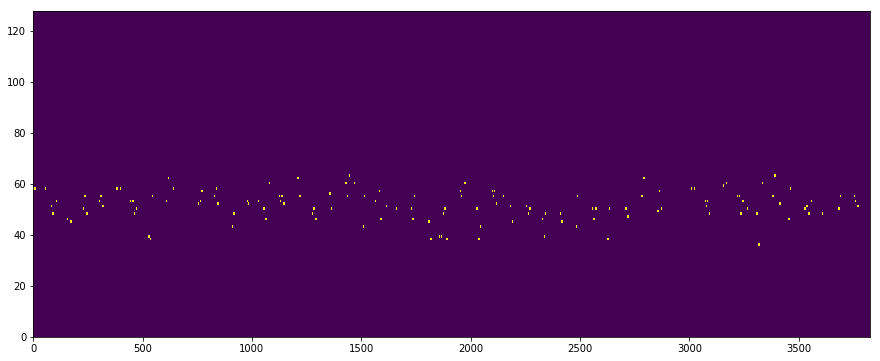

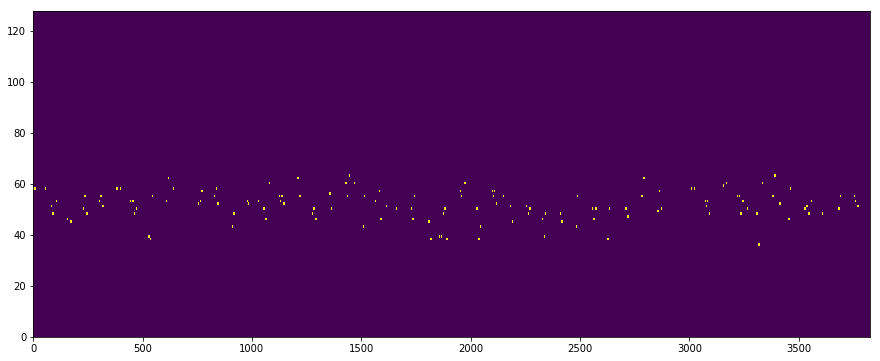

In [494]:
fname = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-03.mid'
filename=fname
if 1:
    mid = mido.MidiFile(filename)
    mid.TEMPO = get_tempo(mid)
    lst = []
    for track in mid.tracks:
        mroll = track2midi(track,TEMPO=mid.TEMPO,ticks_per_beat= mid.ticks_per_beat)
        if mroll is not None:
            plot_midi_roll(mroll)
            lst.append(mroll)
    OUTPUT = midi_merge(*lst)
    
#     if DEBUG:
#         plot_midi_roll(OUTPUT)
#     return OUTPUT


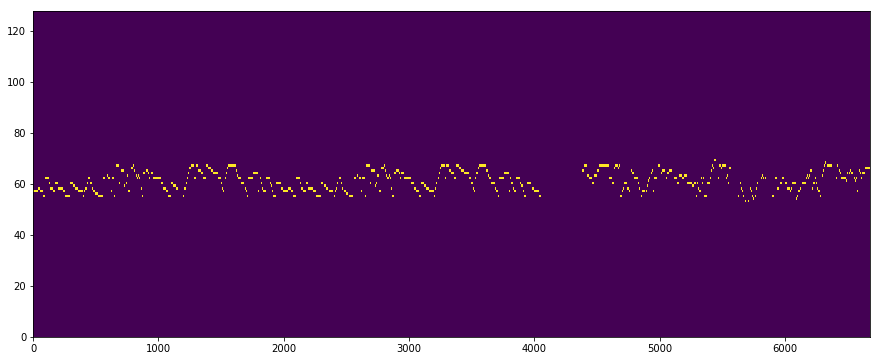

<meta message track_name name=u'Trombone III' time=0>
6800


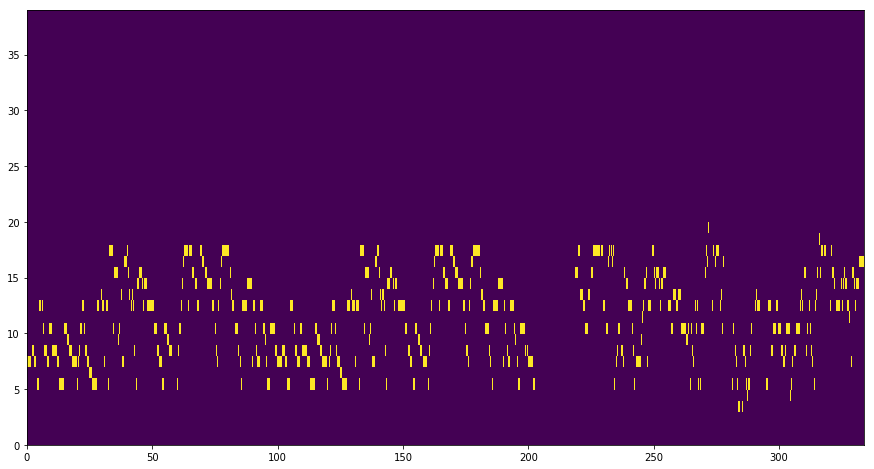

In [377]:
%matplotlib inline
# ?plt.pcolormesh`
print track[0]
xs = mido.tick2second( np.arange(OUTPUT.shape[0])*sample_intick, mid.ticks_per_beat, mid.TEMPO)
OUTPUT = np.array(OUTPUT)
# plt.pcolormesh(xs[:100],range(40),OUTPUT.T[50:90,:100])
T = 6800
# T = len(OUTPUT)
plt.figure(figsize = [15,8])
print T
plt.pcolormesh(xs[:T],range(40),OUTPUT.T[50:90,:T])
# plt.pcolormesh(OUTPUT.T[50:90,500:1000])
# OUTPUT.shape
# OUTPUT[:,70].tolist()

In [53]:
for t in  mid.tracks:
    if  len(t) > 10:
        for m in t:
            print m
        break
#     print(t.__dict__)
#     print(t[1])      
#     print t

<meta message set_tempo tempo=500000 time=0>
<midi track '' 4 messages>
<meta message end_of_track time=127>
<midi track u'(C) & (P) 1993' 2 messages>
<meta message end_of_track time=0>
<midi track u'CCARH,Stanford' 2 messages>
<meta message track_name name=u'Oboe I & II' time=0>
program_change channel=0 program=69 time=0
note_on channel=0 note=69 velocity=88 time=13440
note_off channel=0 note=69 velocity=0 time=1905
note_on channel=0 note=70 velocity=88 time=15
note_off channel=0 note=70 velocity=0 time=945
note_on channel=0 note=69 velocity=88 time=15
note_off channel=0 note=69 velocity=0 time=945
note_on channel=0 note=67 velocity=88 time=15
note_off channel=0 note=67 velocity=0 time=945
note_on channel=0 note=74 velocity=88 time=15
note_off channel=0 note=74 velocity=0 time=945
note_on channel=0 note=74 velocity=88 time=15
note_off channel=0 note=74 velocity=0 time=470
note_on channel=0 note=72 velocity=88 time=10
note_off channel=0 note=72 velocity=0 time=470
note_on channel=0 not

In [47]:
# dir(mid)
print len(track)

for x in mid.tracks[0]:
    if x.type == 'set_tempo':
        TEMPO = x.tempo
#     print(x.type)
#     break
# for x in mid.tracks[1]:
#     print(x)
# for x in mid.tracks[2]:
#     print(x)
# mid.__dict__
# track

1123


In [6]:
for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
        print(msg)

Track 0: 
<meta message time_signature numerator=2 denominator=2 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=500000 time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=0 frames=0 sub_frames=93 time=0>
<meta message end_of_track time=0>
Track 1: (C) & (P) 1993
<meta message track_name name=u'(C) & (P) 1993' time=0>
<meta message end_of_track time=127>
Track 2: CCARH,Stanford
<meta message track_name name=u'CCARH,Stanford' time=0>
<meta message end_of_track time=0>
Track 3: Oboe I & II
<meta message track_name name=u'Oboe I & II' time=0>
program_change channel=0 program=69 time=0
note_on channel=0 note=69 velocity=88 time=13440
note_off channel=0 note=69 velocity=0 time=1905
note_on channel=0 note=70 velocity=88 time=15
note_off channel=0 note=70 velocity=0 time=945
note_on channel=0 note=69 velocity=88 time=15
note_off channel=0 note=69 velocity=0 time=945
note_on channel=0 note=67 velocity=88 time=15
note_off channel=0 

note_off channel=2 note=69 velocity=0 time=1905
note_on channel=2 note=72 velocity=88 time=12495
note_off channel=2 note=72 velocity=0 time=1905
note_on channel=2 note=70 velocity=88 time=15
note_off channel=2 note=70 velocity=0 time=945
note_on channel=2 note=69 velocity=88 time=15
note_off channel=2 note=69 velocity=0 time=945
note_on channel=2 note=67 velocity=88 time=15
note_off channel=2 note=67 velocity=0 time=945
note_on channel=2 note=72 velocity=88 time=15
note_off channel=2 note=72 velocity=0 time=945
note_on channel=2 note=71 velocity=88 time=15
note_off channel=2 note=71 velocity=0 time=945
note_on channel=2 note=70 velocity=88 time=15
note_off channel=2 note=70 velocity=0 time=945
note_on channel=2 note=69 velocity=88 time=15
note_off channel=2 note=69 velocity=0 time=1905
note_on channel=2 note=67 velocity=88 time=15
note_off channel=2 note=67 velocity=0 time=1905
note_on channel=2 note=69 velocity=88 time=14415
note_off channel=2 note=69 velocity=0 time=1905
note_on chan

note_off channel=3 note=60 velocity=0 time=116
note_on channel=3 note=62 velocity=88 time=4
note_off channel=3 note=62 velocity=0 time=116
note_on channel=3 note=63 velocity=88 time=4
note_off channel=3 note=63 velocity=0 time=234
note_on channel=3 note=65 velocity=88 time=6
note_off channel=3 note=65 velocity=0 time=116
note_on channel=3 note=67 velocity=88 time=4
note_off channel=3 note=67 velocity=0 time=116
note_on channel=3 note=68 velocity=88 time=4
note_off channel=3 note=68 velocity=0 time=234
note_on channel=3 note=67 velocity=88 time=6
note_off channel=3 note=67 velocity=0 time=116
note_on channel=3 note=65 velocity=88 time=4
note_off channel=3 note=65 velocity=0 time=116
note_on channel=3 note=67 velocity=88 time=4
note_off channel=3 note=67 velocity=0 time=470
note_on channel=3 note=67 velocity=88 time=10
note_off channel=3 note=67 velocity=0 time=470
note_on channel=3 note=62 velocity=88 time=730
note_off channel=3 note=62 velocity=0 time=234
note_on channel=3 note=67 velo

note_on channel=5 note=67 velocity=88 time=4
note_off channel=5 note=67 velocity=0 time=470
note_on channel=5 note=66 velocity=88 time=10
note_off channel=5 note=66 velocity=0 time=470
note_on channel=5 note=74 velocity=88 time=250
note_off channel=5 note=74 velocity=0 time=234
note_on channel=5 note=79 velocity=88 time=6
note_off channel=5 note=79 velocity=0 time=234
note_on channel=5 note=77 velocity=88 time=6
note_off channel=5 note=77 velocity=0 time=234
note_on channel=5 note=75 velocity=88 time=6
note_off channel=5 note=75 velocity=0 time=234
note_on channel=5 note=74 velocity=88 time=6
note_off channel=5 note=74 velocity=0 time=116
note_on channel=5 note=72 velocity=88 time=4
note_off channel=5 note=72 velocity=0 time=116
note_on channel=5 note=77 velocity=88 time=4
note_off channel=5 note=77 velocity=0 time=945
note_on channel=5 note=75 velocity=88 time=15
note_off channel=5 note=75 velocity=0 time=234
note_on channel=5 note=72 velocity=88 time=6
note_off channel=5 note=72 velo

note_off channel=7 note=60 velocity=0 time=950
note_on channel=7 note=59 velocity=88 time=10
note_off channel=7 note=59 velocity=0 time=470
note_on channel=7 note=60 velocity=88 time=10
note_off channel=7 note=60 velocity=0 time=234
note_on channel=7 note=55 velocity=88 time=6
note_off channel=7 note=55 velocity=0 time=234
note_on channel=7 note=60 velocity=88 time=6
note_off channel=7 note=60 velocity=0 time=234
note_on channel=7 note=58 velocity=88 time=6
note_off channel=7 note=58 velocity=0 time=234
note_on channel=7 note=57 velocity=88 time=6
note_off channel=7 note=57 velocity=0 time=234
note_on channel=7 note=62 velocity=88 time=6
note_off channel=7 note=62 velocity=0 time=234
note_on channel=7 note=60 velocity=88 time=6
note_off channel=7 note=60 velocity=0 time=234
note_on channel=7 note=62 velocity=88 time=6
note_off channel=7 note=62 velocity=0 time=234
note_on channel=7 note=55 velocity=88 time=6
note_off channel=7 note=55 velocity=0 time=218
note_on channel=7 note=55 veloc

note_on channel=8 note=31 velocity=88 time=6
note_on channel=8 note=43 velocity=88 time=0
note_off channel=8 note=31 velocity=0 time=234
note_off channel=8 note=43 velocity=0 time=0
note_on channel=8 note=29 velocity=88 time=6
note_on channel=8 note=41 velocity=88 time=0
note_off channel=8 note=29 velocity=0 time=234
note_off channel=8 note=41 velocity=0 time=0
note_on channel=8 note=27 velocity=88 time=6
note_on channel=8 note=39 velocity=88 time=0
note_off channel=8 note=27 velocity=0 time=116
note_off channel=8 note=39 velocity=0 time=0
note_on channel=8 note=26 velocity=88 time=4
note_on channel=8 note=38 velocity=88 time=0
note_off channel=8 note=26 velocity=0 time=116
note_off channel=8 note=38 velocity=0 time=0
note_on channel=8 note=27 velocity=88 time=4
note_on channel=8 note=39 velocity=88 time=0
note_off channel=8 note=27 velocity=0 time=116
note_off channel=8 note=39 velocity=0 time=0
note_on channel=8 note=29 velocity=88 time=4
note_on channel=8 note=41 velocity=88 time=0


note_on channel=10 note=50 velocity=88 time=6
note_off channel=10 note=50 velocity=0 time=234
note_on channel=10 note=58 velocity=88 time=6
note_off channel=10 note=58 velocity=0 time=218
note_on channel=10 note=58 velocity=88 time=22
note_off channel=10 note=58 velocity=0 time=234
note_on channel=10 note=58 velocity=88 time=6
note_off channel=10 note=58 velocity=0 time=234
note_on channel=10 note=57 velocity=88 time=6
note_off channel=10 note=57 velocity=0 time=116
note_on channel=10 note=58 velocity=88 time=4
note_off channel=10 note=58 velocity=0 time=116
note_on channel=10 note=60 velocity=88 time=4
note_off channel=10 note=60 velocity=0 time=218
note_on channel=10 note=60 velocity=88 time=22
note_off channel=10 note=60 velocity=0 time=234
note_on channel=10 note=60 velocity=88 time=6
note_off channel=10 note=60 velocity=0 time=234
note_on channel=10 note=58 velocity=88 time=6
note_off channel=10 note=58 velocity=0 time=116
note_on channel=10 note=60 velocity=88 time=4
note_off cha